# Road Dataset Analysis

In [264]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.1 MB 24.4 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 25.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/43.6 MB 23.8 MB/s eta 0:00:02
   ----------- ---------------------------- 12.8/43.6 MB 31.0 MB/s eta 0:00:01
   ------------------- -------------------- 21.5/43.6 MB 34.0 MB/s eta 0:00:01
   --------------------------- ------------ 29.6/43.6 MB 35.5 MB/s eta 0:00:01
   ---------------------------------- ----- 38.0/43.6 MB 36.1 MB/s eta 0:00:01
   ---------------------------------------  43.5/43.6 MB 36.0 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 33.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [265]:
# Library import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns
from sklearn import linear_model




In [266]:
from sklearn.preprocessing import LabelEncoder

In [156]:
Data=pd.read_excel("Road Accident Data.xlsx")


In [157]:
Data.head(100)

Accident_Index Accident Date Month Day_of_Week  Year  \
0   200901BS70001    2021-01-01   Jan    Thursday  2021   
1   200901BS70002    2021-01-05   Jan      Monday  2021   
2   200901BS70003    2021-01-04   Jan      Sunday  2021   
3   200901BS70004    2021-01-05   Jan      Monday  2021   
4   200901BS70005    2021-01-06   Jan     Tuesday  2021   
..            ...           ...   ...         ...   ...   
95  200901BS70122    2021-03-04   Mar   Wednesday  2021   
96  200901BS70123    2021-02-07   Feb    Saturday  2021   
97  200901BS70124    2021-03-17   Mar     Tuesday  2021   
98  200901BS70126    2021-02-24   Feb     Tuesday  2021   
99  200901BS70128    2021-03-20   Mar      Friday  2021   

            Junction_Control          Junction_Detail Accident_Severity  \
0   Give way or uncontrolled  T or staggered junction           Serious   
1   Give way or uncontrolled               Crossroads           Serious   
2   Give way or uncontrolled  T or staggered junction            Slight   
3        Auto traffic signal  T or staggered junction           Serious   
4        Auto traffic signal               Crossroads           Serious   
..                       ...                      ...               ...   
95       Auto traffic signal  T or staggered junction            Slight   
96  Give way or uncontrolled               Crossroads            Slight   
97       Auto traffic signal               Crossroads            Slight   
98  Give way or uncontrolled  T or staggered junction           Serious   
99  Give way or uncontrolled  T or staggered junction            Slight   

     Latitude       Light_Conditions  ... Number_of_Casualties  \
0   51.512273               Daylight  ...                    1   
1   51.514399               Daylight  ...                   11   
2   51.486668               Daylight  ...                    1   
3   51.507804               Daylight  ...                    1   
4   51.482076  Darkness - lights lit  ...                    1   
..        ...                    ...  ...                  ...   
95  51.486622               Daylight  ...                    1   
96  51.504966               Daylight  ...                    1   
97  51.495660  Darkness - lights lit  ...                    1   
98  51.490535               Daylight  ...                    1   
99  51.486213               Daylight  ...                    1   

   Number_of_Vehicles         Police_Force  Road_Surface_Conditions  \
0                   2  Metropolitan Police                      Dry   
1                   2  Metropolitan Police              Wet or damp   
2                   2  Metropolitan Police                      Dry   
3                   2  Metropolitan Police             Frost or ice   
4                   2  Metropolitan Police                      Dry   
..                ...                  ...                      ...   
95                  2  Metropolitan Police              Wet or damp   
96                  1  Metropolitan Police                      Dry   
97                  1  Metropolitan Police                      Dry   
98                  2  Metropolitan Police                      Dry   
99                  2  Metropolitan Police                      Dry   

             Road_Type Speed_limit      Time Urban_or_Rural_Area  \
0       One way street          30  15:11:00               Urban   
1   Single carriageway          30  10:59:00               Urban   
2   Single carriageway          30  14:19:00               Urban   
3   Single carriageway          30  08:10:00               Urban   
4   Single carriageway          30  17:25:00               Urban   
..                 ...         ...       ...                 ...   
95  Single carriageway          30  07:05:00               Urban   
96  Single carriageway          30  13:15:00               Urban   
97  Single carriageway          30  23:00:00               Urban   
98  Single carriageway          30  08:00:00               Urban   

## EDA Analysis

In [158]:
Data.dtypes


Accident_Index                        object
Accident Date                 datetime64[ns]
Month                                 object
Day_of_Week                           object
Year                                   int64
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Carriageway_Hazards                   object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int64
Time                                  object
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Ty

### Description of numerical Data

In [159]:
Data.describe()

Accident Date           Year       Latitude  \
count                         307973  307973.000000  307973.000000   
mean   2021-12-23 22:19:39.804722944    2021.468934      52.487005   
min              2021-01-01 00:00:00    2021.000000      49.914488   
25%              2021-06-28 00:00:00    2021.000000      51.485248   
50%              2021-12-08 00:00:00    2021.000000      52.225943   
75%              2022-06-25 00:00:00    2022.000000      53.415517   
max              2022-12-31 00:00:00    2022.000000      60.598055   
std                              NaN       0.499035       1.339011   

           Longitude  Number_of_Casualties  Number_of_Vehicles    Speed_limit  
count  307973.000000         307973.000000       307973.000000  307973.000000  
mean       -1.368884              1.356882            1.829063      38.866037  
min        -7.516225              1.000000            1.000000      10.000000  
25%        -2.247937              1.000000            1.000000      30.000000  
50%        -1.349258              1.000000            2.000000      30.000000  
75%        -0.206810              1.000000            2.000000      50.000000  
max         1.759398             48.000000           32.000000      70.000000  
std         1.356092              0.815857            0.710477      14.032933

### Sort Values by Date

In [160]:
Data.sort_values("Accident Date")


Accident_Index Accident Date Month Day_of_Week  Year  \
0       200901BS70001    2021-01-01   Jan    Thursday  2021   
113126  2010000000000    2021-01-01   Jan    Thursday  2021   
63710   2009170S10189    2021-01-01   Jan    Thursday  2021   
16841   200901TX20018    2021-01-01   Jan    Thursday  2021   
159165  200997BA70101    2021-01-01   Jan    Thursday  2021   
...               ...           ...   ...         ...   ...   
245101  201032B404910    2022-12-31   Dec      Friday  2022   
218859  201014A210710    2022-12-31   Dec      Friday  2022   
218866  201014A211610    2022-12-31   Dec      Friday  2022   
229518  201020S500960    2022-12-31   Dec      Friday  2022   
234930  201022C100077    2022-12-31   Dec      Friday  2022   

                    Junction_Control                      Junction_Detail  \
0           Give way or uncontrolled              T or staggered junction   
113126  Data missing or out of range  Not at junction or within 20 metres   
63710            Auto traffic signal              T or staggered junction   
16841       Give way or uncontrolled                      Mini-roundabout   
159165  Data missing or out of range  Not at junction or within 20 metres   
...                              ...                                  ...   
245101      Give way or uncontrolled    More than 4 arms (not roundabout)   
218859           Auto traffic signal              T or staggered junction   
218866      Give way or uncontrolled              T or staggered junction   
229518      Give way or uncontrolled              T or staggered junction   
234930      Give way or uncontrolled              T or staggered junction   

       Accident_Severity   Latitude        Light_Conditions  ...  \
0                Serious  51.512273                Daylight  ...   
113126            Slight  50.716192   Darkness - lights lit  ...   
63710             Slight  54.560816   Darkness - lights lit  ...   
16841             Slight  51.497357   Darkness - lights lit  ...   
159165            Slight  55.868520   Darkness - lights lit  ...   
...                  ...        ...                     ...  ...   
245101            Slight  52.910343   Darkness - lights lit  ...   
218859           Serious  53.506979   Darkness - lights lit  ...   
218866            Slight  53.509198   Darkness - lights lit  ...   
229518           Serious  52.389374                Daylight  ...   
234930            Slight  52.094914  Darkness - no lighting  ...   

       Number_of_Casualties Number_of_Vehicles         Police_Force  \
0                         1                  2  Metropolitan Police   
113126                    1                  4            Hampshire   
63710                     1                  2            Cleveland   
16841                     1                  2  Metropolitan Police   
159165                    1                  1          Strathclyde   
...                     ...                ...                  ...   
245101                    1                  2         Lincolnshire   
218859                    1                  3      South Yorkshire   
218866                    1                  2      South Yorkshire   
229518                    1                  2        West Midlands   
234930                    1                  1          West Mercia   

        Road_Surface_Conditions           Road_Type Speed_limit      Time  \
0                           Dry      One way street          30  15:11:00   
113126                      Dry  Single carriageway          30  01:20:00   
63710                       Dry  Single carriageway          30  20:45:00   
16841                       Dry  Single carriageway          30  19:05:00   
159165              Wet or damp    Dual carriageway          60  04:01:00   
...                         ...                 ...         ...       ...   
245101                      Dry      One way street          30  19:00:00   
218859              Wet or damp    Dual

#### 1. Value Counts of accidents per Month

In [188]:
Data['Month'].value_counts()

Month
Nov    29095
Oct    28368
Jul    26953
Sep    26752
Jun    26748
May    26183
Mar    25543
Aug    25503
Apr    24225
Jan    23384
Dec    23334
Feb    21885
Name: count, dtype: int64

#### 2. Value Counts of accidents per Day of Week

In [189]:
Data['Day_of_Week'].value_counts()

Day_of_Week
Friday       50529
Tuesday      46386
Wednesday    46381
Thursday     45649
Monday       43918
Saturday     41566
Sunday       33544
Name: count, dtype: int64

### 3.Value Counts by Year

In [190]:
Data['Year'].value_counts()

Year
2021    163554
2022    144419
Name: count, dtype: int64

### 4.Value Counts of Junction Control 

In [186]:
table_juntion_control=Data['Junction_Control'].value_counts()

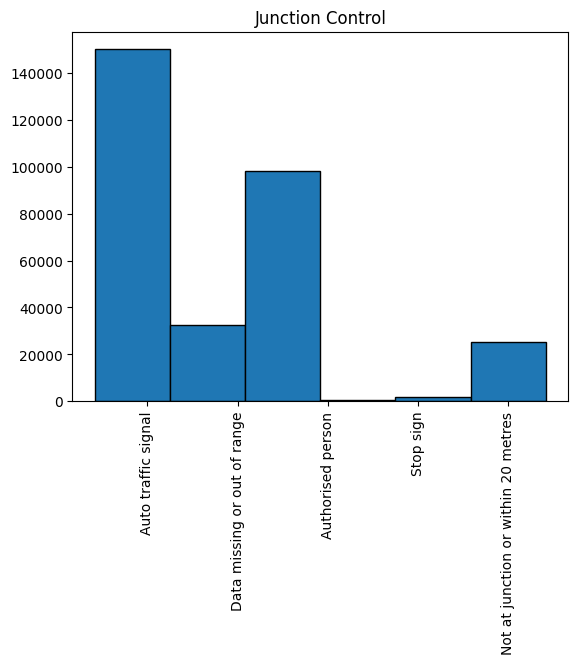

In [187]:
plt.hist(x=Data['Junction_Control'],edgecolor='black',align='right',bins=6)
plt.xticks(rotation=90)
plt.title("Junction Control")
plt.show()

### 5.Value Counts of accidents junction Detail

In [164]:
Data['Junction_Detail'].value_counts()


Junction_Detail
Not at junction or within 20 metres    123094
T or staggered junction                 96718
Crossroads                              29948
Roundabout                              27264
Private drive or entrance               10875
Other junction                           8315
Slip road                                4265
More than 4 arms (not roundabout)        4148
Mini-roundabout                          3346
Name: count, dtype: int64

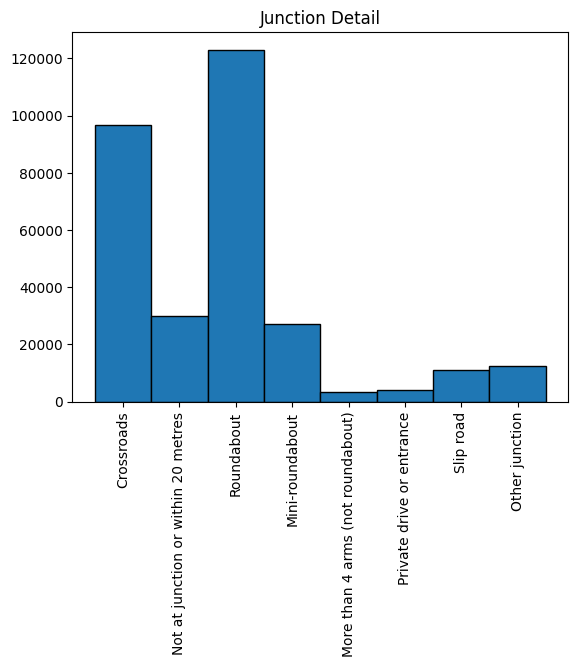

In [165]:
plt.hist(x=Data['Junction_Detail'],edgecolor='black',align='right',bins=8)
plt.xticks(rotation=90)
plt.title('Junction Detail')
plt.show()

### 6.Value counts the Local Authirity of accident

In [166]:
Data['Local_Authority_(District)'].value_counts()

Local_Authority_(District)
Birmingham            6165
Leeds                 4140
Manchester            3132
Bradford              3006
Westminster           2811
                      ... 
Clackmannanshire        25
Alnwick                 20
South Shropshire        18
Teesdale                15
Berwick-upon-Tweed      13
Name: count, Length: 422, dtype: int64

### 7.Value Counts of ligth Conditions of the accident

In [167]:
Data['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: count, dtype: int64

### 8.Value Counts of Carriageway Hazards of the accident

In [168]:
Data['Carriageway_Hazards'].value_counts()

Carriageway_Hazards
Other object on road                               2243
Any animal in carriageway (except ridden horse)    1620
Pedestrian in carriageway - not injured             715
Previous accident                                   511
Vehicle load on road                                335
Name: count, dtype: int64

In [169]:
Data[['Number_of_Casualties','Number_of_Vehicles','Speed_limit']].describe()

Number_of_Casualties  Number_of_Vehicles    Speed_limit
count         307973.000000       307973.000000  307973.000000
mean               1.356882            1.829063      38.866037
std                0.815857            0.710477      14.032933
min                1.000000            1.000000      10.000000
25%                1.000000            1.000000      30.000000
50%                1.000000            2.000000      30.000000
75%                1.000000            2.000000      50.000000
max               48.000000           32.000000      70.000000

### 9.Value Counts of  Police force of the accident

In [170]:
Data['Police_Force'].value_counts()


Police_Force
Metropolitan Police      46789
West Midlands            13509
West Yorkshire           12016
Greater Manchester       11954
Thames Valley            11483
Kent                      9995
Hampshire                 9492
Lancashire                9143
Devon and Cornwall        8804
Sussex                    8548
Essex                     8239
Avon and Somerset         7929
Surrey                    7897
Northumbria               7557
South Yorkshire           7258
Staffordshire             6479
Merseyside                6373
Cheshire                  6288
Nottinghamshire           6223
West Mercia               5995
Derbyshire                5818
South Wales               5685
Hertfordshire             5493
Leicestershire            5326
Cambridgeshire            5219
Humberside                5024
Lincolnshire              4780
Strathclyde               4635
North Yorkshire           4451
Dorset                    3998
Suffolk                   3759
Norfolk                   

### 10. Value Counts of Road Surface Conditions of the accident

In [171]:
Data['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208967
Wet or damp              81479
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

### 11. Value Counts of Accidents Road type

In [172]:
Data['Road_Type'].value_counts()

Road_Type
Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               3234
Name: count, dtype: int64

### 12. Value Counts of Urban or Rural area of the Accident

In [173]:
Data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    198532
Rural    109441
Name: count, dtype: int64

### 13. Value Counts of Weather Conditions of the accident

In [174]:
Data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       244496
Raining no high winds     34877
Other                      8802
Snowing no high winds      4839
Raining + high winds       3526
Fine + high winds          3148
Fog or mist                1690
Snowing + high winds        538
Name: count, dtype: int64

### 14 Value Counts of Vehicle type of the accidents

In [178]:
Data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

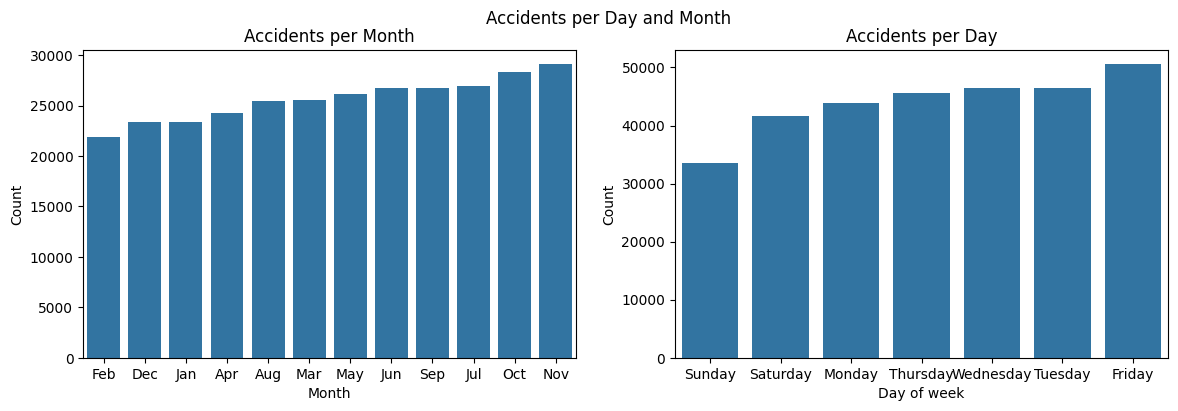

In [238]:

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(14,4))
fig.suptitle("Accidents per Day and Month")
sns.barplot(x=Data['Month'].value_counts().sort_values().index, y=Data['Month'].value_counts().sort_values().values,ax=axs[0])
axs[0].set_title('Accidents per Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
sns.barplot(x=Data['Day_of_Week'].value_counts().sort_values().index,y=Data['Day_of_Week'].value_counts().sort_values().values,ax=axs[1])
axs[1].set_title('Accidents per Day')
axs[1].set_xlabel('Day of week')
axs[1].set_ylabel('Count')
plt.show()

In [144]:

map = folium.Map(location=[55.3781, -3.4360], zoom_start=6.5)
HeatMap(zip(Data['Latitude'],Data['Longitude'])).add_to(map) 
map.save("heatmap.html")
map

In [ ]:
# Output variable for Logistic Regresion
Data['Accident_Severity'].value_counts()

Accident_Severity
Slight     263280
Serious     40740
Fatal        3953
Name: count, dtype: int64

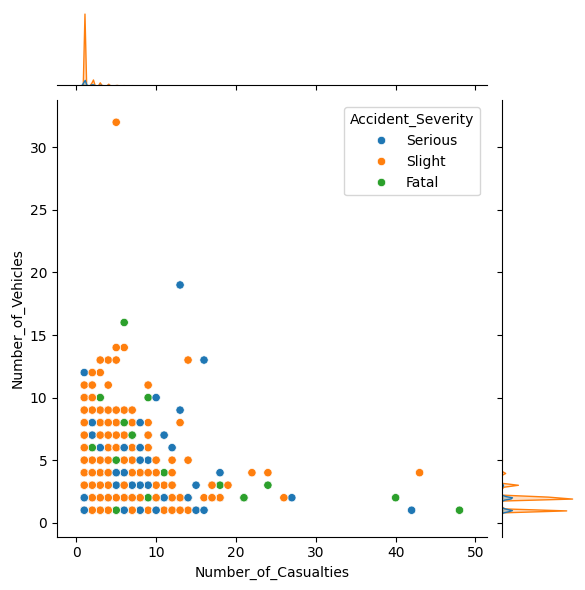

In [239]:
sns.jointplot(data=Data, x='Number_of_Casualties',y='Number_of_Vehicles',hue='Accident_Severity')

## Identification of Ouliers

<Axes: xlabel='Accident_Severity', ylabel='Number_of_Casualties'>

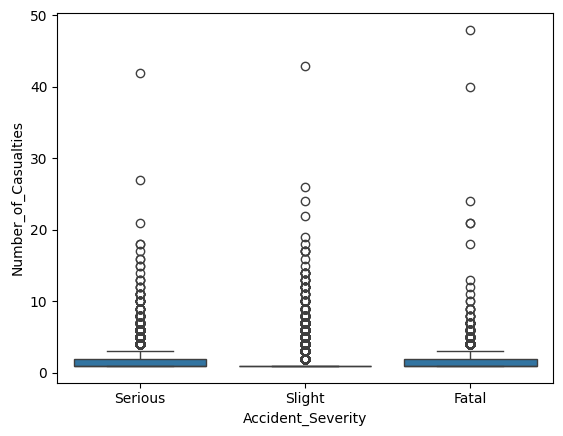

In [242]:
sns.boxplot(x='Accident_Severity',y='Number_of_Casualties',data=Data)

<Axes: xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

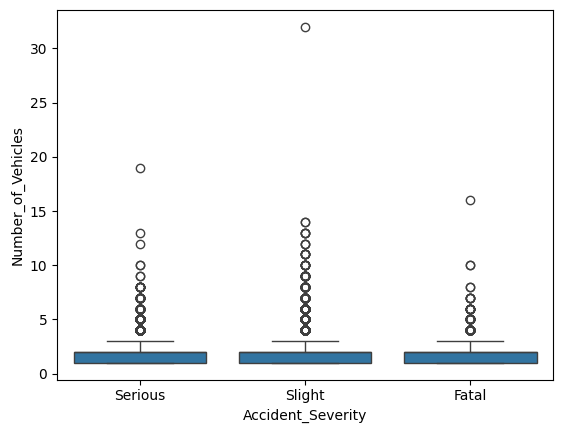

In [243]:
sns.boxplot(x='Accident_Severity',y='Number_of_Vehicles',data=Data)

6926910

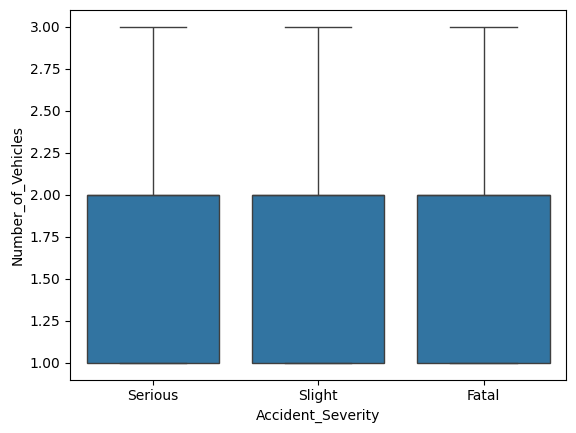

In [250]:
Data_Clean=Data[Data['Number_of_Vehicles']<=3]
sns.boxplot(x='Accident_Severity',y='Number_of_Vehicles',data=Data_Clean)
Data_Clean.size

In [276]:

data_encoded = Data_Clean.copy() 
label_encoder = LabelEncoder()
columns_to_encode = ['Month','Day_of_Week','Junction_Control','Junction_Detail','Light_Conditions'
                     ,'Carriageway_Hazards','Road_Surface_Conditions'
                     ,'Road_Type','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type','Accident_Severity']
for col in columns_to_encode:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

data_encoded.head()


Accident_Index Accident Date  Month  Day_of_Week  Year  Junction_Control  \
0  200901BS70001    2021-01-01      4            4  2021                 3   
1  200901BS70002    2021-01-05      4            1  2021                 3   
2  200901BS70003    2021-01-04      4            3  2021                 3   
3  200901BS70004    2021-01-05      4            1  2021                 1   
4  200901BS70005    2021-01-06      4            5  2021                 1   

   Junction_Detail  Accident_Severity   Latitude  Light_Conditions  ...  \
0                8                  1  51.512273                 4  ...   
1                0                  1  51.514399                 4  ...   
2                8                  2  51.486668                 4  ...   
3                8                  1  51.507804                 4  ...   
4                0                  1  51.482076                 1  ...   

  Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                    1                   2  Metropolitan Police   
1                   11                   2  Metropolitan Police   
2                    1                   2  Metropolitan Police   
3                    1                   2  Metropolitan Police   
4                    1                   2  Metropolitan Police   

   Road_Surface_Conditions  Road_Type Speed_limit      Time  \
0                        0          1          30  15:11:00   
1                        4          3          30  10:59:00   
2                        0          3          30  14:19:00   
3                        2          3          30  08:10:00   
4                        0          3          30  17:25:00   

   Urban_or_Rural_Area  Weather_Conditions Vehicle_Type  
0                    1                   1            2  
1                    1                   1           13  
2                    1                   1           13  
3                    1                   3            9  
4                    1                   1            2  

[5 rows x 23 columns]

In [277]:
data_encoded.dtypes

Accident_Index                        object
Accident Date                 datetime64[ns]
Month                                  int64
Day_of_Week                            int64
Year                                   int64
Junction_Control                       int64
Junction_Detail                        int64
Accident_Severity                      int64
Latitude                             float64
Light_Conditions                       int64
Local_Authority_(District)            object
Carriageway_Hazards                    int64
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions                int64
Road_Type                              int64
Speed_limit                            int64
Time                                  object
Urban_or_Rural_Area                    int64
Weather_Conditions                     int64
Vehicle_Ty

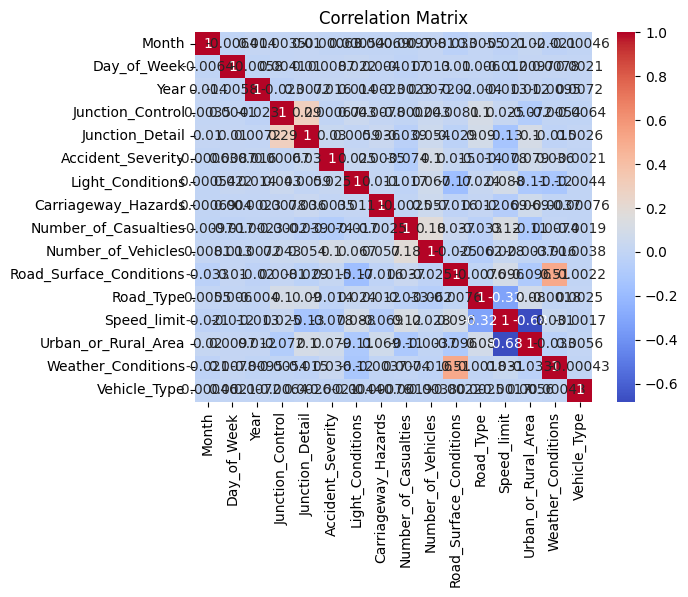

In [278]:
df_int = data_encoded.select_dtypes(include=['int64', 'int32'])
Correlation_matrix=df_int.corr()
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Implementation of model

### Logistic Regresion